In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from glob import glob

## Part 1 - Compute the camera calibration matrix and distortion coefficients given a set of chessboard images

In [34]:
images = glob('camera_cal/calibration*.jpg')

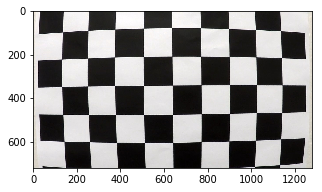

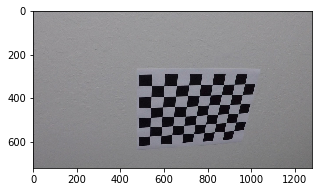

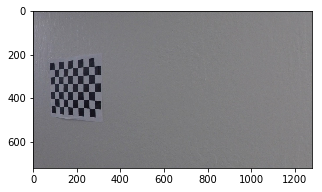

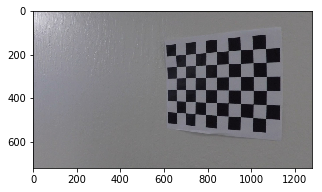

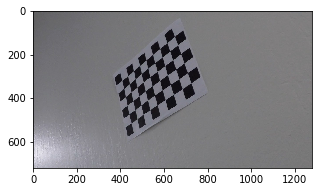

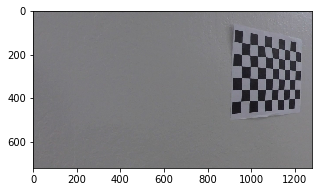

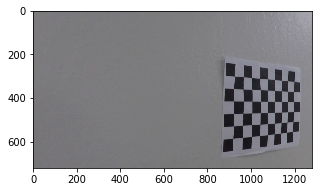

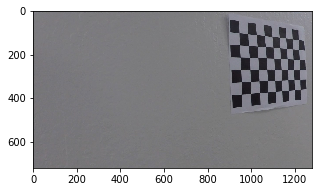

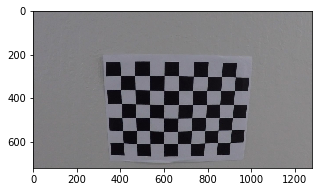

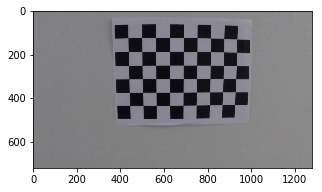

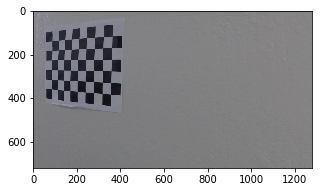

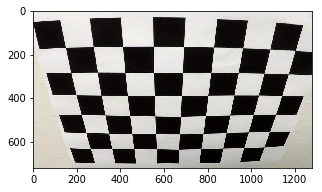

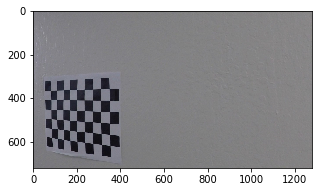

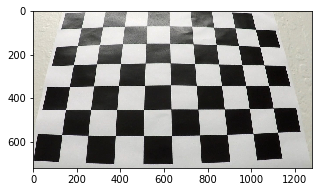

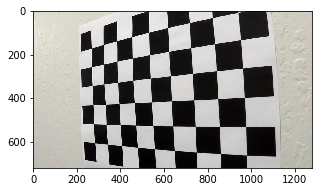

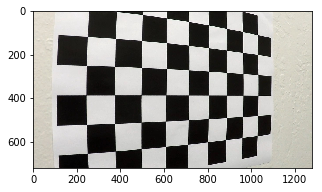

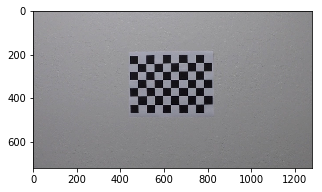

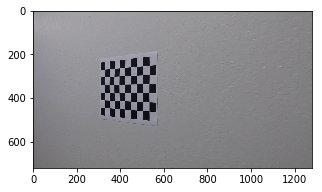

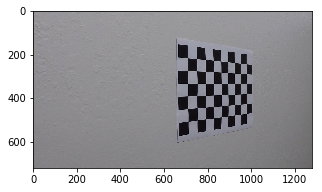

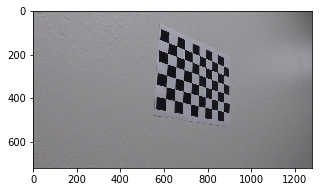

In [35]:
for i in range(len(images)):
    plt.figure(figsize=(5,5))
    img = mpimg.imread(images[i])
    plt.imshow(img)
plt.show()

In [52]:
def cameraCalibrationDistortion(images):
    
    obj = np.zeros((6*9, 3), np.float32)
    obj[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1, 2)

    objpoints = []
    imgpoints = []
    
    for name in images:
        img = mpimg.imread(name)
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

        ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

        if ret==True:
            imgpoints.append(corners)
            objpoints.append(obj)

            img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
    return cv2.calibrateCamera(objpoints, imgpoints, img.shape[1::-1], None, None)

In [53]:
ret, mtx, dist, rvecs, tvecs = cameraCalibrationDistortion(images)

## Part 2 : Apply distortion correction to raw images.

In [54]:
def distortionCorrection(img, mtx, dist):
    return cv2.undistort(img, mtx, dist, None, mtx)

In [57]:
img = mpimg.imread('camera_cal/calibration2.jpg')
dst = distortionCorrection(img, mtx, dist)

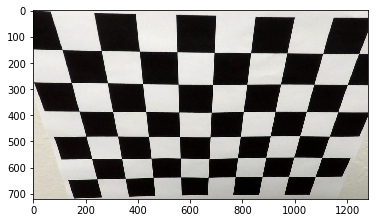

In [58]:
plt.imshow(dst)
plt.show()